## 2. Data Understanding and Preparation

### 2.1 Research Goal and Operationalization

` ⭐️ TODO`

### 2.2 Data Overview

> We examined the App Store and found that most mental health apps fall under the categories `Gesundeit und Fitness` and `Medizin`, with some also in `Lifestyle`. So, we used SQL&Python to filter the data.

- Number of apps and reviews after filtering.
    - apps: `46324` / 55485 (**83%**)
        - Medizin: `12947`
        - Gesundeit und Fitness: `29917`
        - lifestyle: `3460`
    - reviews: `443945` / 520353 (**85%**)
        - Medizin: `35472`
        - Gesundeit und Fitness: `390203`
        - lifestyle: `18270`
- Brief description of key variables (metadata and text).
    - `⭐️ TODO`

### 2.3 Cleaning and Filtering
- Handle outliers (e.g., extreme prices, extremely low number of ratings).
    - 0 <= `review_average`, `rating` <= 5
    - `review_one`,`review_two`,`review_there`,`review_four`, `review_five`: int & >=0
    - `size`,`price_eur` >= 0
- Check missing values in important variables and decide on imputation vs. dropping.
    - keep: because they carry meaningful information.
        - `iphone_version`、`ipad_version`、`ipod_version`、`mac_version`
        - `privacy_linked`、`privacy_unlinked`、`privacy_tracked`、`privacy_policy_link`
        - `rank_from_pickle`
    - imputation:
        - `privacy_not_collected`: change data type  (`text => boolean`)
        - `price_eur`: base on `price` (`text => float`)
    - dropping: 
        - Apps data without app_reviews record.
        - outliers datas (e.g., extreme prices, extremely low number of ratings).
- Document inclusion criteria and any comparator groups (e.g., medical vs. non-medical apps). 
    - criteria groups: `df_medizin`
    - comparator groups: `df_medizin_not`

In [1]:
# 2. Data Understanding and Preparation
# 2.2 Data Overview
# TODO: Load your datasets here and perform basic checks
from sqlalchemy import create_engine  # use SQLAlchemy connecting to the database
import pandas as pd

# Stored in the `.env` file.  <- Replace it with real params.
host = "localhost"
port = 5432
user = "postgres"
password = 123456
db = "DatenBank"

# connect to the database
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}")
# query the raw data.
query_apps = "SELECT * FROM apple_apps;"
query_reviews = "SELECT * FROM app_reviews;"
apps = pd.read_sql(query_apps, engine)
reviews = pd.read_sql(query_reviews, engine)
# Check the data has been loaded correctly.
apps.head()
reviews.head()

,review_id,app_id,date,developerresponse,review,rating,isedited,username,title
0,1,1000017994,2022-08-30 06:46:56,"{""id"": 32104844, ""body"": ""Ich hoffe euch geht ...",Danke finde das Programm sehr gut habe da ich ...,4,False,gelpe,Leider nicht in deutsch
1,2,1000017994,2017-10-03 21:38:05,,Cardiogram ist meiner Meinung nach die beste P...,5,False,dr_ben,Must have
2,3,1000017994,2018-04-29 18:44:59,,"Leider nur auf Englisch, trotzdem 5*",5,False,Ludo374,Optimal mit Iwatch
3,4,1000017994,2017-11-20 05:44:46,,Nutze sie seid 2 Wochen und bin bisher sehr zu...,4,False,Lars Engmann,Cardiogram App
4,5,1000017994,2021-04-28 06:29:27,"{""id"": 22490197, ""body"": ""Hi axolotta, I'm sor...",Ich kann meine Bewertung deshalb auch wieder n...,5,True,axolotta,Problem schnell behoben


In [3]:
# TODO: basic checks missing values (NULL)
reviews.isna().sum()         # all's good
apps.isna().sum()            # rank_from_pickle has 54839 NULL, but is meaningful => keep!

app_id                       0
link                         0
app_name                     0
developer_name               0
category                     0
price                        0
description                  0
similar_apps                 0
review_count                 0
review_average               0
review_one                   0
review_two                   0
review_three                 0
review_four                  0
review_five                  0
iphone_version               0
ipad_version                 0
ipod_version                 0
mac_version                  0
size                         0
languages                    0
age                          0
privacy_linked               0
privacy_unlinked             0
privacy_tracked              0
privacy_not_collected        0
version_history              0
in_app_purchases             0
privacy_policy_link          0
rank_from_pickle         54839
dtype: int64

In [4]:
# TODO: basic checks missing values (0)
(reviews == 0).sum()     # all matching data is `int | boolean` => keep!
(apps == 0).sum()        # all matching data is `int | boolean` => keep!

app_id                       0
link                         0
app_name                     0
developer_name               0
category                     0
price                        0
description                  0
similar_apps                 0
review_count             42650
review_average           42650
review_one               49375
review_two               51898
review_three             51059
review_four              49612
review_five              44609
iphone_version               0
ipad_version                 0
ipod_version                 0
mac_version                  0
size                         0
languages                    0
age                          0
privacy_linked               0
privacy_unlinked             0
privacy_tracked              0
privacy_not_collected        0
version_history              0
in_app_purchases             0
privacy_policy_link          0
rank_from_pickle             0
dtype: int64

In [5]:
 # TODO: Number of apps and reviews after filtering.
query_apps_medizin = """
SELECT * FROM apple_apps WHERE category IN ( 'Medizin', 'Gesundheit und Fitness', 'Lifestyle');
"""
query_apps_medizin_not = """ 
SELECT * FROM apple_apps WHERE category NOT IN ( 'Medizin', 'Gesundheit und Fitness', 'Lifestyle'); 
"""
query_reviews_medizin = """ 
SELECT r.* FROM app_reviews r JOIN apple_apps a ON r.app_id = a.app_id WHERE category IN ( 'Medizin', 'Gesundheit und Fitness', 'Lifestyle');
"""
query_reviews_medizin_not = """ 
SELECT r.* FROM app_reviews r JOIN apple_apps a ON r.app_id = a.app_id WHERE category NOT IN ( 'Medizin', 'Gesundheit und Fitness', 'Lifestyle');
"""
apps_medizin = pd.read_sql(query_apps_medizin, engine)
apps_medizin_not = pd.read_sql(query_apps_medizin_not, engine)
reviews_medizin = pd.read_sql(query_reviews_medizin, engine)
reviews_medizin_not = pd.read_sql(query_reviews_medizin_not, engine)

print(
    "apps             – Anzahl Zeilen:", apps.shape[0], "\n" 
    "apps_medizin     – Anzahl Zeilen:", apps_medizin.shape[0], round(apps_medizin.shape[0] / apps.shape[0], 2)*100,"% \n" 
    "apps_medizin_not – Anzahl Zeilen:", apps_medizin_not.shape[0], round(apps_medizin_not.shape[0] / apps.shape[0], 2)*100, "%"
)
print(
    "reviews             – Anzahl Zeilen:", reviews.shape[0], "\n" 
    "reviews_medizin     – Anzahl Zeilen:", reviews_medizin.shape[0], "\n"  
    "reviews_medizin_not – Anzahl Zeilen:", reviews_medizin_not.shape[0]
)
print("apps – Anzahl Spalten:", apps.shape[1])
print("reviews – Anzahl Spalten:", reviews.shape[1])

apps             – Anzahl Zeilen: 55485 
apps_medizin     – Anzahl Zeilen: 46324 83.0 % 
apps_medizin_not – Anzahl Zeilen: 9161 17.0 %
reviews             – Anzahl Zeilen: 520353 
reviews_medizin     – Anzahl Zeilen: 443945 
reviews_medizin_not – Anzahl Zeilen: 71303
apps – Anzahl Spalten: 30
reviews – Anzahl Spalten: 9


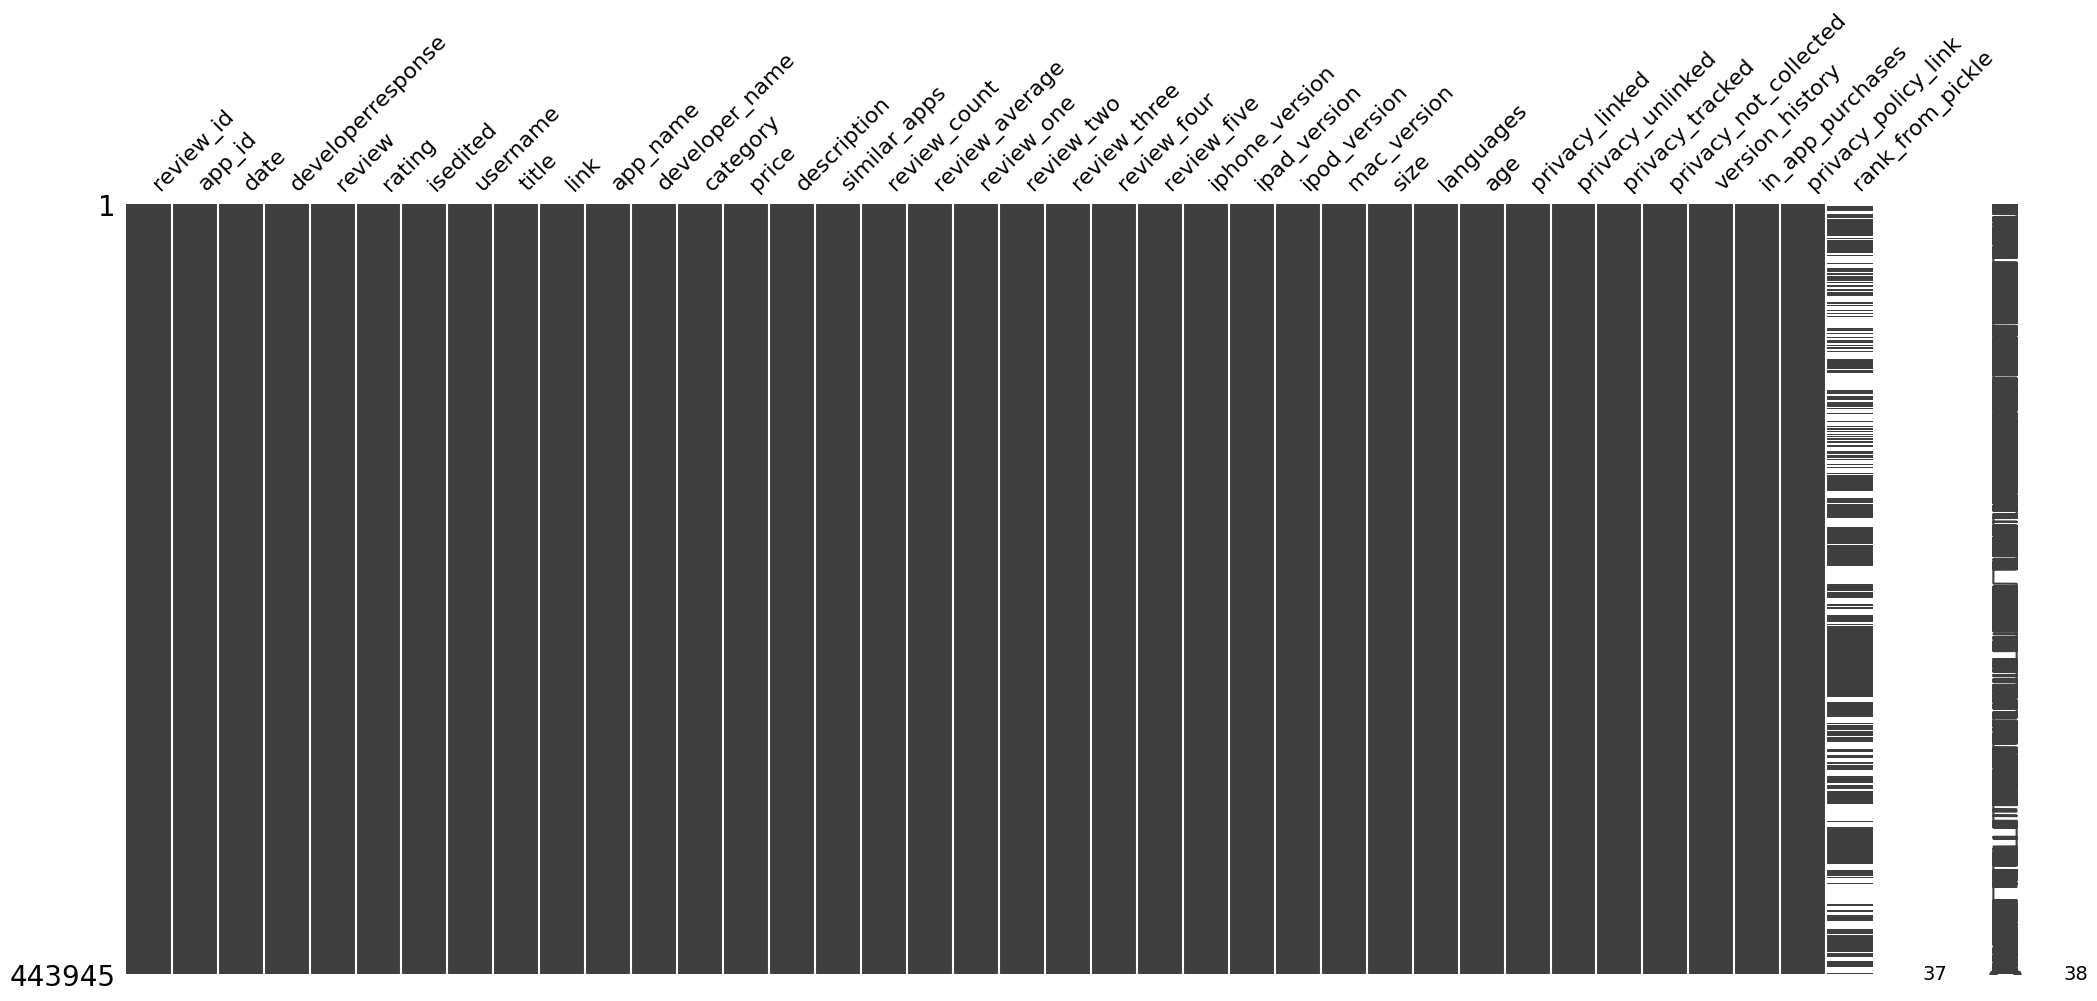

In [6]:
# visualize missing data (raw)
import missingno as msno
import matplotlib.pyplot as plt

df_medizin = reviews_medizin.merge(apps_medizin, on="app_id", how="left")
df_medizin_not = reviews_medizin_not.merge(apps_medizin_not, on="app_id", how="left")
msno.matrix(df_medizin)
plt.show()

In [7]:
# Check the data types to prepare for further data cleaning. (38 items)
df_medizin.dtypes.to_frame(name="dtype").reset_index(names="") 

,,dtype
0,review_id,int64
1,app_id,int64
2,date,datetime64[ns]
3,developerresponse,object
4,review,object
5,rating,int64
6,isedited,bool
7,username,object
8,title,object
9,link,object


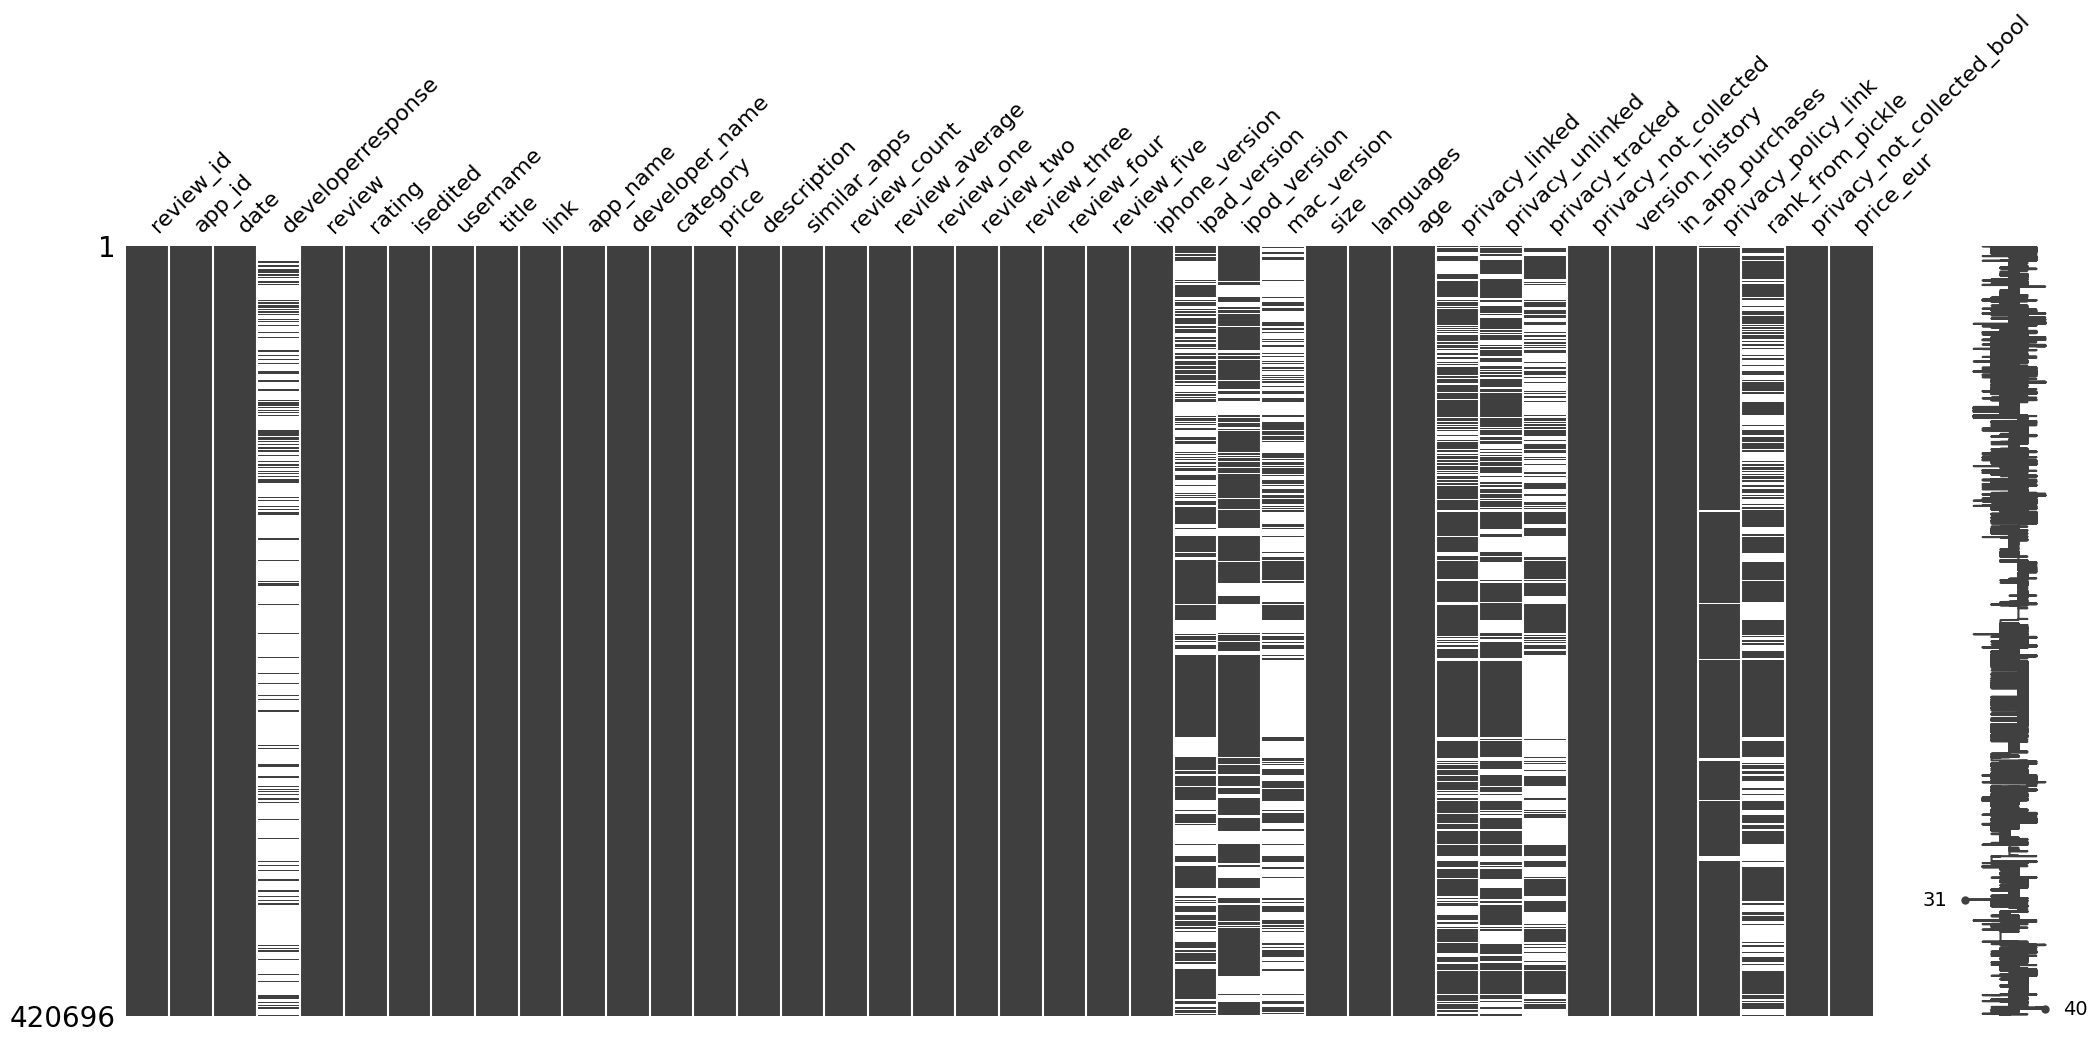

In [8]:
# visualize missing data (after filtering)
import numpy as np

# TODO: mark empty string values ("") as missing values (NULL).
df_medizin['link'] = df_medizin['link'].replace('', np.nan)
df_medizin['app_name'] = df_medizin['app_name'].replace('', np.nan)
df_medizin['developer_name'] = df_medizin['developer_name'].replace('', np.nan)
df_medizin['category'] = df_medizin['category'].replace('', np.nan)
# df_medizin['price'] = df_medizin['price'].replace('', np.nan)
df_medizin['description'] = df_medizin['description'].replace('', np.nan)
df_medizin['similar_apps'] = df_medizin['similar_apps'].replace('', np.nan)
df_medizin['iphone_version'] = df_medizin['iphone_version'].replace('', np.nan)
df_medizin['ipad_version'] = df_medizin['ipad_version'].replace('', np.nan)
df_medizin['ipod_version'] = df_medizin['ipod_version'].replace('', np.nan)
df_medizin['mac_version'] = df_medizin['mac_version'].replace('', np.nan)
df_medizin['languages'] = df_medizin['languages'].replace('', np.nan)
df_medizin['privacy_linked'] = df_medizin['privacy_linked'].replace('', np.nan)
df_medizin['privacy_unlinked'] = df_medizin['privacy_unlinked'].replace('', np.nan)
df_medizin['privacy_tracked'] = df_medizin['privacy_tracked'].replace('', np.nan)
# df_medizin['privacy_not_collected'] = df_medizin['privacy_not_collected'].replace('', np.nan)
df_medizin['version_history'] = df_medizin['version_history'].replace('', np.nan)
df_medizin['in_app_purchases'] = df_medizin['in_app_purchases'].replace('', np.nan)
df_medizin['privacy_policy_link'] = df_medizin['privacy_policy_link'].replace('', np.nan)
df_medizin['developerresponse'] = df_medizin['developerresponse'].replace('', np.nan)
df_medizin['review'] = df_medizin['review'].replace('', np.nan)
df_medizin['username'] = df_medizin['username'].replace('', np.nan)
df_medizin['title'] = df_medizin['title'].replace('', np.nan)


# TODO: 
# df_medizin['privacy_not_collected'] = (df_medizin['privacy_not_collected'].astype(str).str.strip().str.lower().eq('true'))
df_medizin['privacy_not_collected_bool'] = (df_medizin['privacy_not_collected'].astype(str).str.strip().str.lower().eq('true'))
# df_medizin['privacy_not_collected'].value_counts(dropna=False)   # check result
df_medizin['price_eur'] = (
    df_medizin['price']
    .astype(str)
    .str.replace('\xa0', '', regex=False)   # delete ' '
    .str.replace('€', '', regex=False)      # delete €
    .str.replace(',', '.', regex=False)     # , => .
    .str.strip()
)

# TODO: Handle outliers data.
cols_0 = ['size']
cols_int_0 = ['review_one', 'review_two', 'review_three', 'review_four', 'review_five']
df_medizin = df_medizin[
    df_medizin['review_average'].between(0, 5, inclusive='both') &  # 0<= Each <=5
    df_medizin['rating'].between(0, 5, inclusive='both') &          # 0<= Each <=5
    (df_medizin[cols_0] > 0).all(axis=1) &                          # Each >0
    (df_medizin[cols_int_0] > 0).all(axis=1) &                      # Each >0
    (df_medizin[cols_int_0] % 1 == 0).all(axis=1)                   # only integer values;
]

# Present an overview of the cleaned data.
msno.matrix(df_medizin)
plt.show()